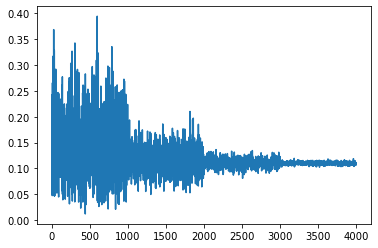

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import dirichlet 
import torch
from torch.distributions.multivariate_normal import MultivariateNormal 
from optimize import MMD
mmd = MMD()
device = 'cuda:0'

results = []

for m in [20, 100, 1000, 10000]:
    for seed in range(1000):
        x_mean = torch.zeros(2)
        y_mean = torch.zeros(2) + 1
        x_cov = 2*torch.eye(2) # IMPORTANT: Covariance matrices must be positive definite
        y_cov = 3*torch.eye(2) - 1
        # torch.random.manual_seed(0)

        px = MultivariateNormal(x_mean, x_cov)
        qy = MultivariateNormal(y_mean, y_cov)
        x = px.sample([m]).to(device)
        y = qy.sample([m]).to(device)

        result = mmd(x, y)
        results.append(result)
# サンプル数が多いと結果はぶれない
plt.plot(results)